In [1]:
from scipy.io import wavfile
from IPython.display import Audio
from scipy.fftpack import fft, ifft,fftfreq,fftshift
from scipy.signal import get_window
from math import ceil
from pylab import figure, imshow, clf, gray, xlabel, ylabel
from scipy.io.wavfile import read
from matplotlib import pyplot as pyplt 
import numpy as np
import sys
import wave
import matplotlib.pyplot as plt
import struct
import scipy
import contextlib


In [2]:
plt.rcParams['figure.figsize']=['50','100']

44100
44100
44100
10.28
7.552380952380952
9.6


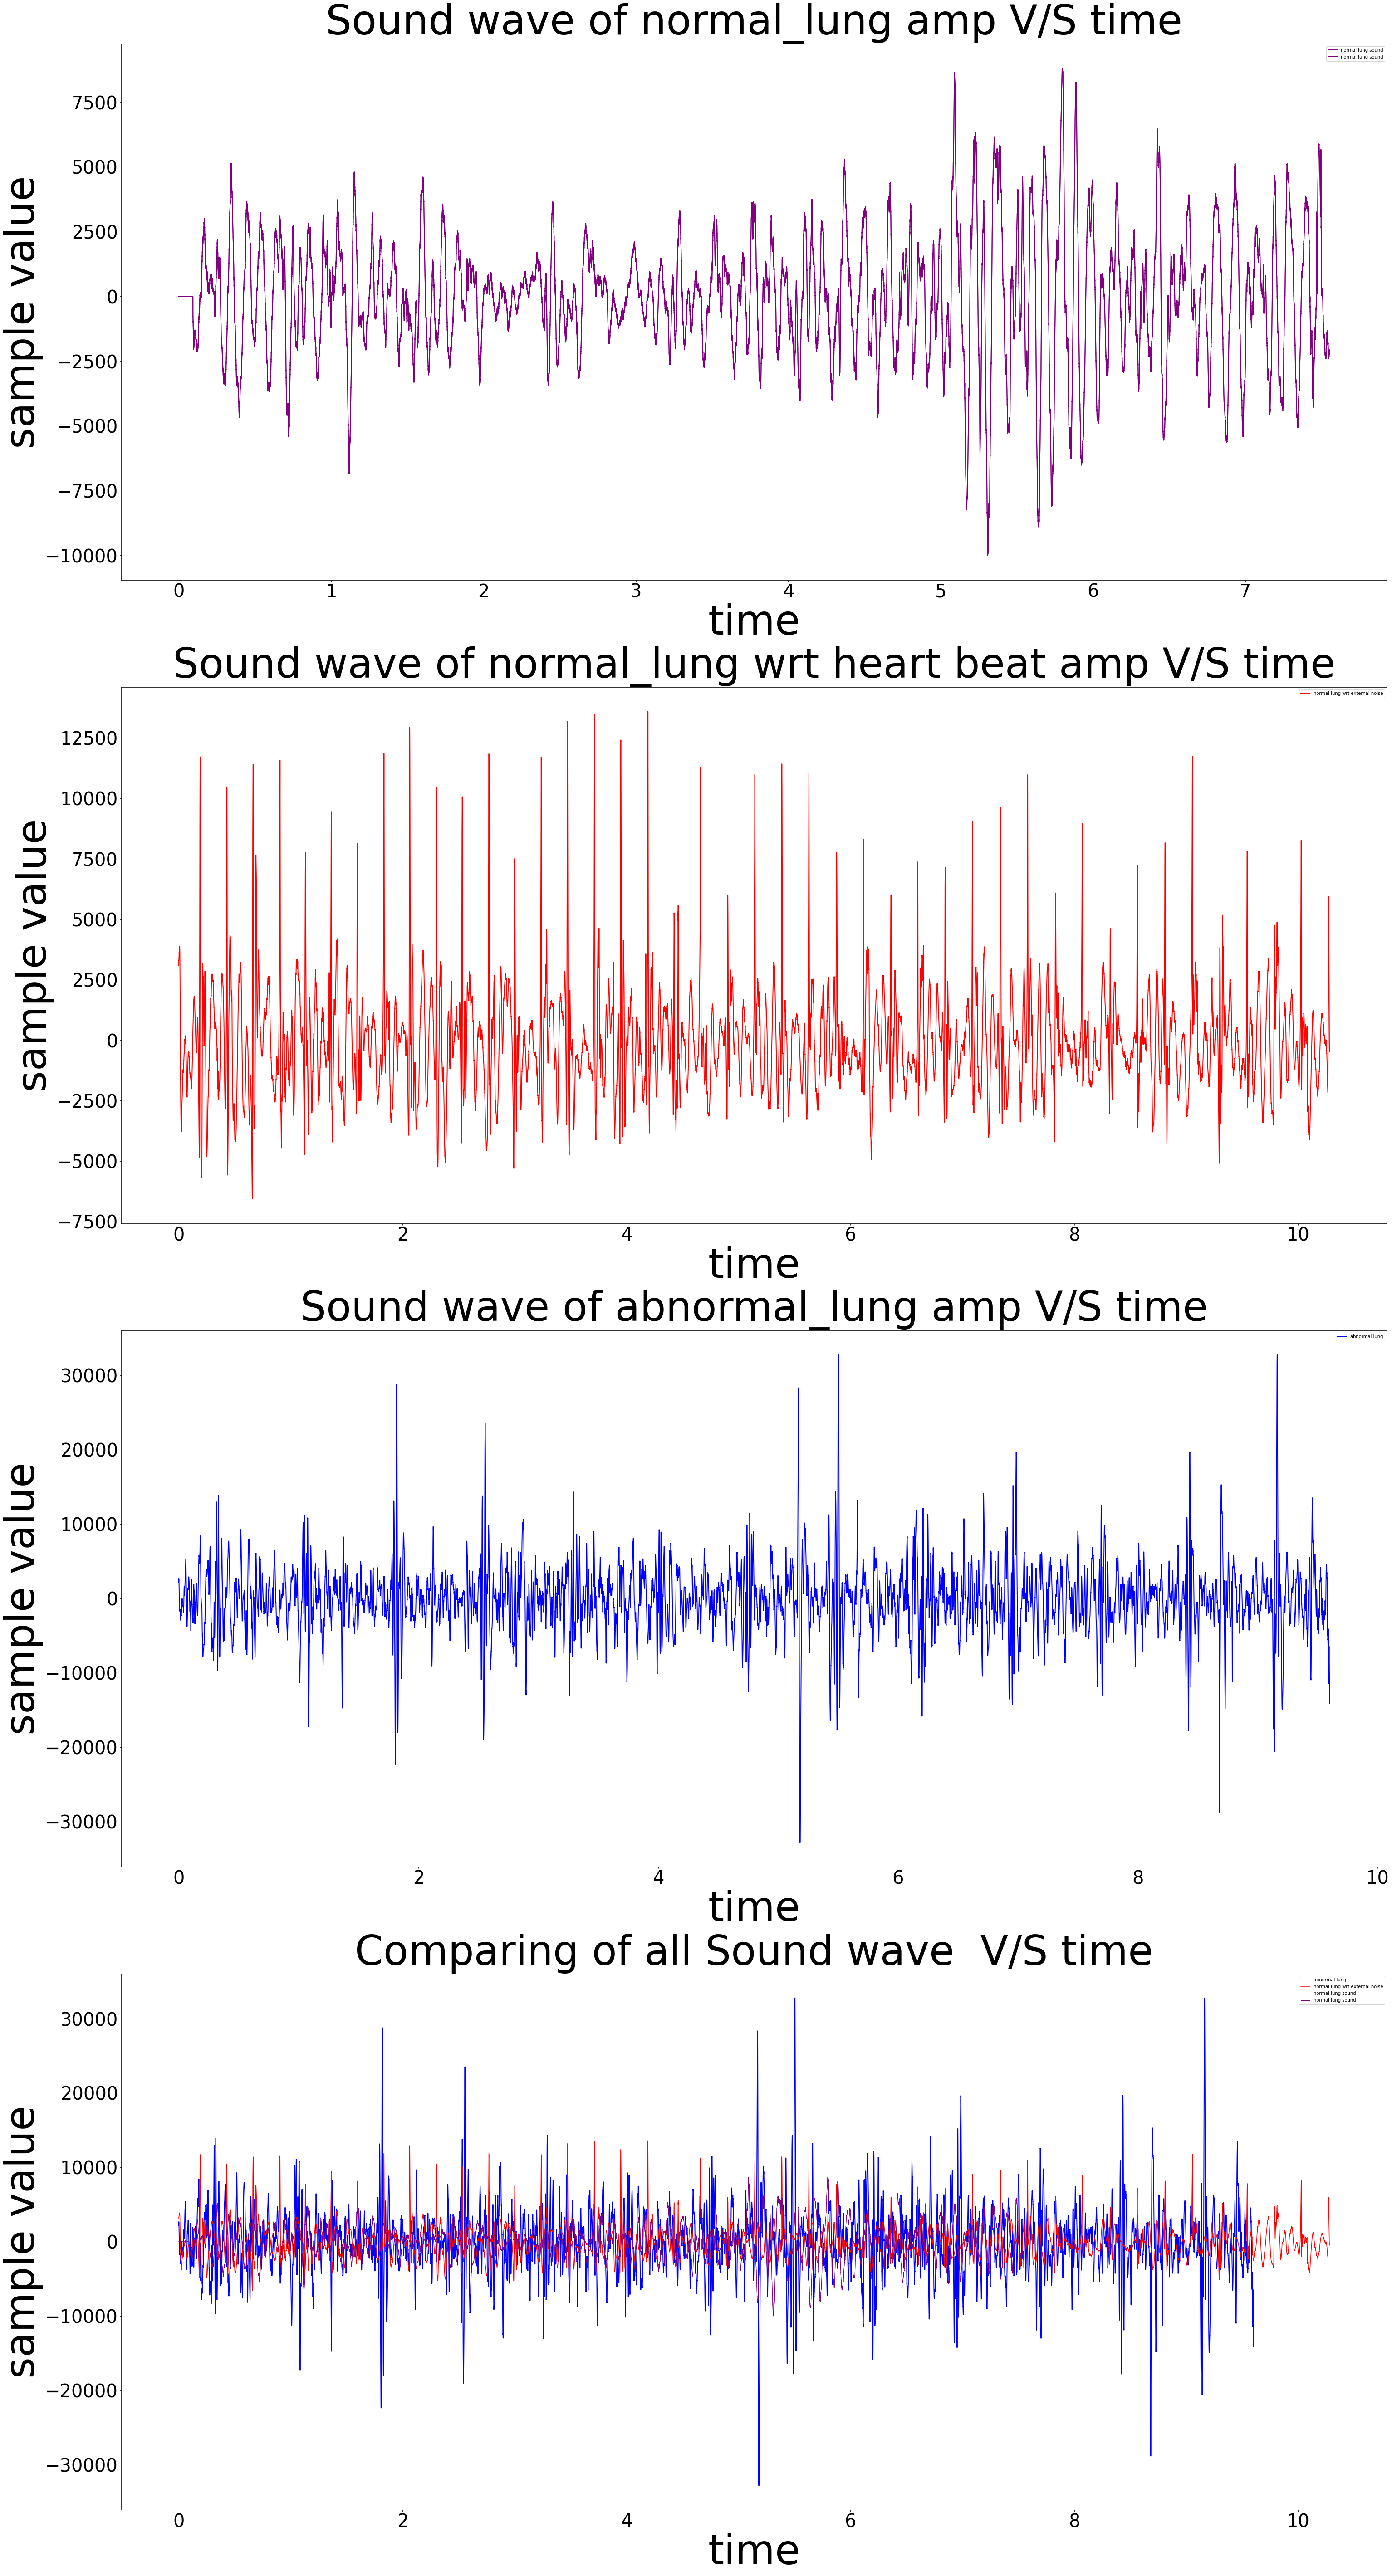

MAX frequency of hart>>
13591
MIN frequency of hart>>
-6561
MAX frequency of lung>>
8811
MIN frequency of lung>>
-10009


In [3]:
file_heart = "101_1b1_Al_sc_Meditron-[AudioTrimmer.com].wav"
file_lung = "162_1b2_Lr_mc_AKGC417L (mp3cut.net).wav"
file_ablung = "130_1p3_Ar_mc_AKGC417L (1) (1).wav"
fs_ablung, wavablung = wavfile.read(file_ablung) 
fs_lung, wavlung = wavfile.read(file_lung)
fs_heart, wavhart = wavfile.read(file_heart)
print(fs_lung)
print(fs_heart)
print(fs_ablung)
dt = 1
'''
TL = 1/fs_lung
TH = 1/fs_heart
dt=0.1


NL = fs_lung *TL
NH = fs_heart * TH
omega1 = 2*np.pi*wavhart
omega2 = 2*np.pi*wavlung
t_lung = np.arange(NL)*TL
t_heart = np.arange(NH)*TH

y1 = np.sin(omega2*t_lung)
y2 = np.sin(omega1*t_heart )

plt.plot(t_lung,y1,color='green',label='Lung')
plt.plot(t_heart,y2,color='red',label='Hart')
'''
with contextlib.closing(wave.open(file_heart,'r')) as f:
    frames1 = f.getnframes()
    rate1 = f.getframerate()
    duration1 = frames1 / float(rate1)
    print(duration1)

duration1 = len(wavhart)/fs_heart

time_heart = np.arange(0,duration1,1/fs_heart)   
time_heart1 = np.arange(0, duration1, dt) 
#print(time_heart1)

with contextlib.closing(wave.open(file_lung,'r')) as f:
    frames2 = f.getnframes()
    rate2 = f.getframerate()
    duration2 = frames2 / float(rate2)
    print(duration2)
duration2 = len(wavlung)/fs_lung
time_lungs = np.arange(0,duration2,1/fs_lung)   

with contextlib.closing(wave.open(file_ablung,'r')) as f:
    frames3 = f.getnframes()
    rate3 = f.getframerate()
    duration3 = frames3 / float(rate3)
    print(duration3)
duration3 = len(wavablung)/fs_ablung
time_ablungs = np.arange(0,duration3,1/fs_ablung)  

fig, axs = plt.subplots(4,1)



plt.sca(axs[0])
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.plot(time_lungs, wavlung, color='purple', linewidth=2,label= 'normal lung sound')
plt.legend()
plt.title ("Sound wave of normal_lung amp V/S time", fontsize=90)


plt.sca(axs[1])
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.plot(time_heart, wavhart, color='r', linewidth=2,label= 'normal lung wrt external noise')
plt.legend()
plt.title ("Sound wave of normal_lung wrt heart beat amp V/S time", fontsize=90)


plt.sca(axs[2])
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.plot(time_ablungs, wavablung, color='b',linewidth=2,label='abnormal lung')
plt.legend()
plt.title ("Sound wave of abnormal_lung amp V/S time", fontsize=90)


plt.sca(axs[3])
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.plot(time_ablungs, wavablung, color='b',linewidth=2,label='abnormal lung')
plt.plot(time_heart, wavhart, color='r', linewidth=1.5,label= 'normal lung wrt external noise')
plt.plot(time_lungs, wavlung, color='purple', linewidth=1,label= 'normal lung sound')
plt.legend()
plt.title ("Comparing of all Sound wave  V/S time", fontsize=90)


plt.show()

print("MAX frequency of hart>>")
print(wavhart.max())
print("MIN frequency of hart>>")
print(wavhart.min())
print("MAX frequency of lung>>")
print(wavlung.max())
print("MIN frequency of lung>>")
print(wavlung.min())

C:\Users\RIL\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


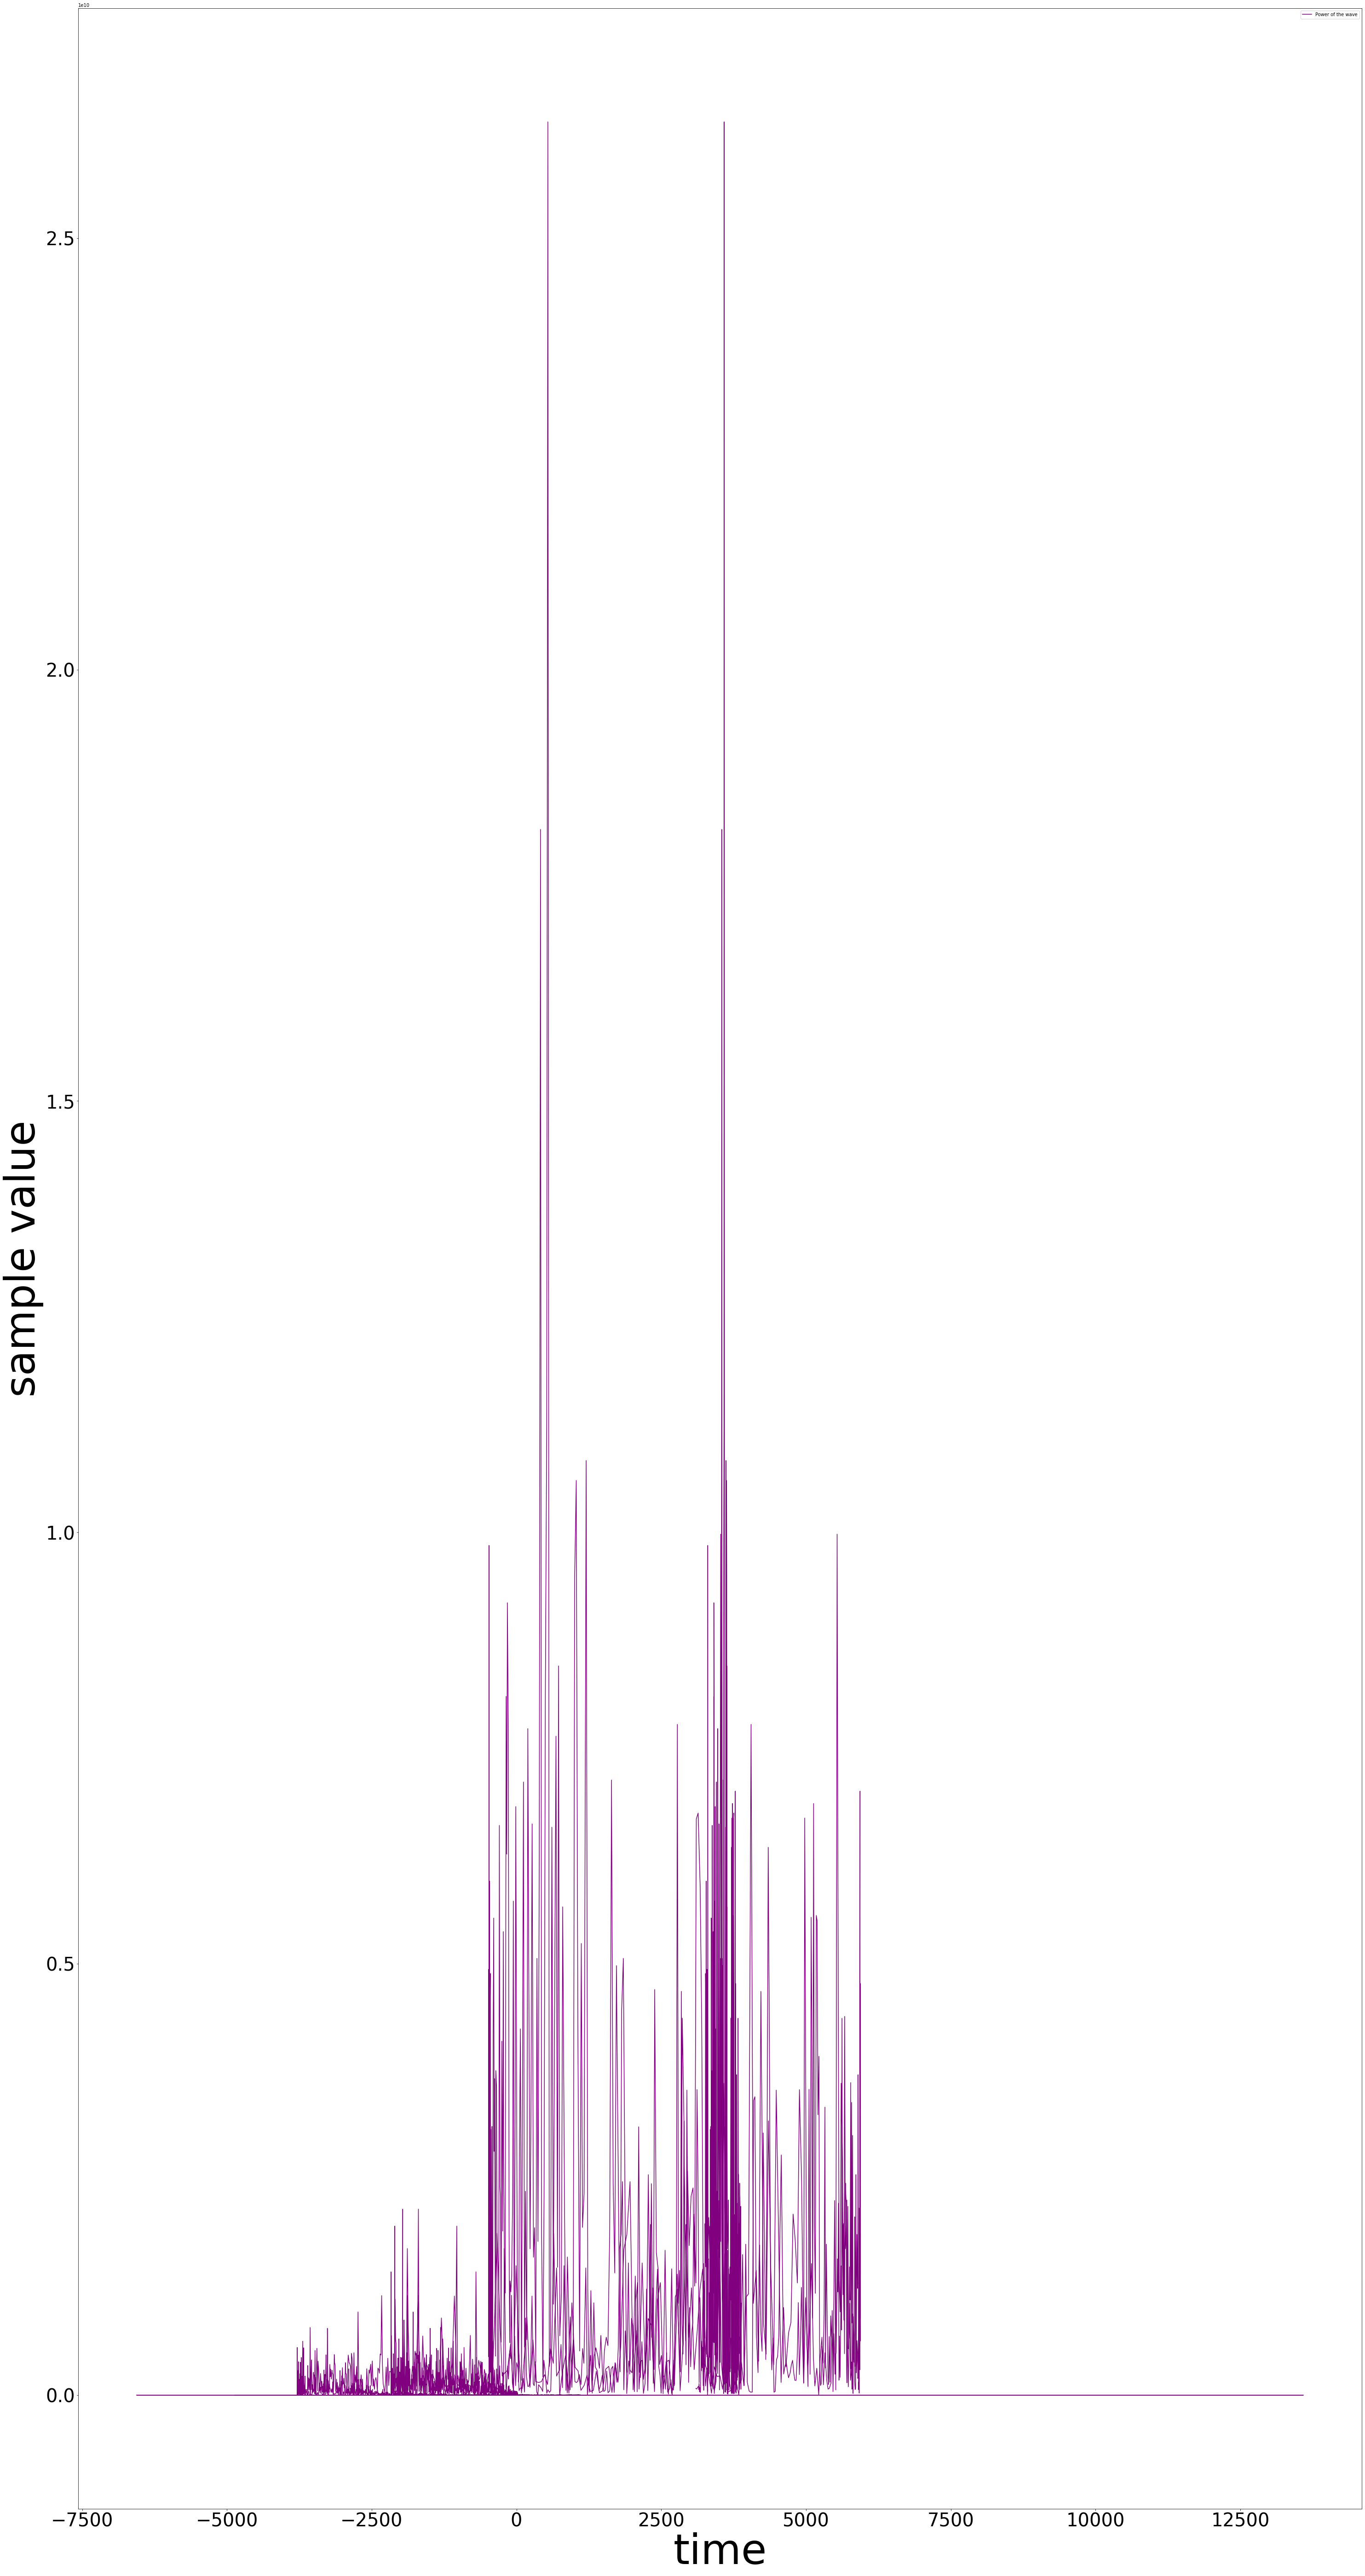

In [4]:
dt = 1
n = len(time_heart)
fhta = np.fft.fft(wavhart,n)
PSD = fhta * np.conj(fhta) / n
freq = (1/(dt * n)) * np.unique(n)
plt.plot(wavhart, PSD,color="purple",label='Power of the wave')
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.legend()

C:\Users\RIL\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


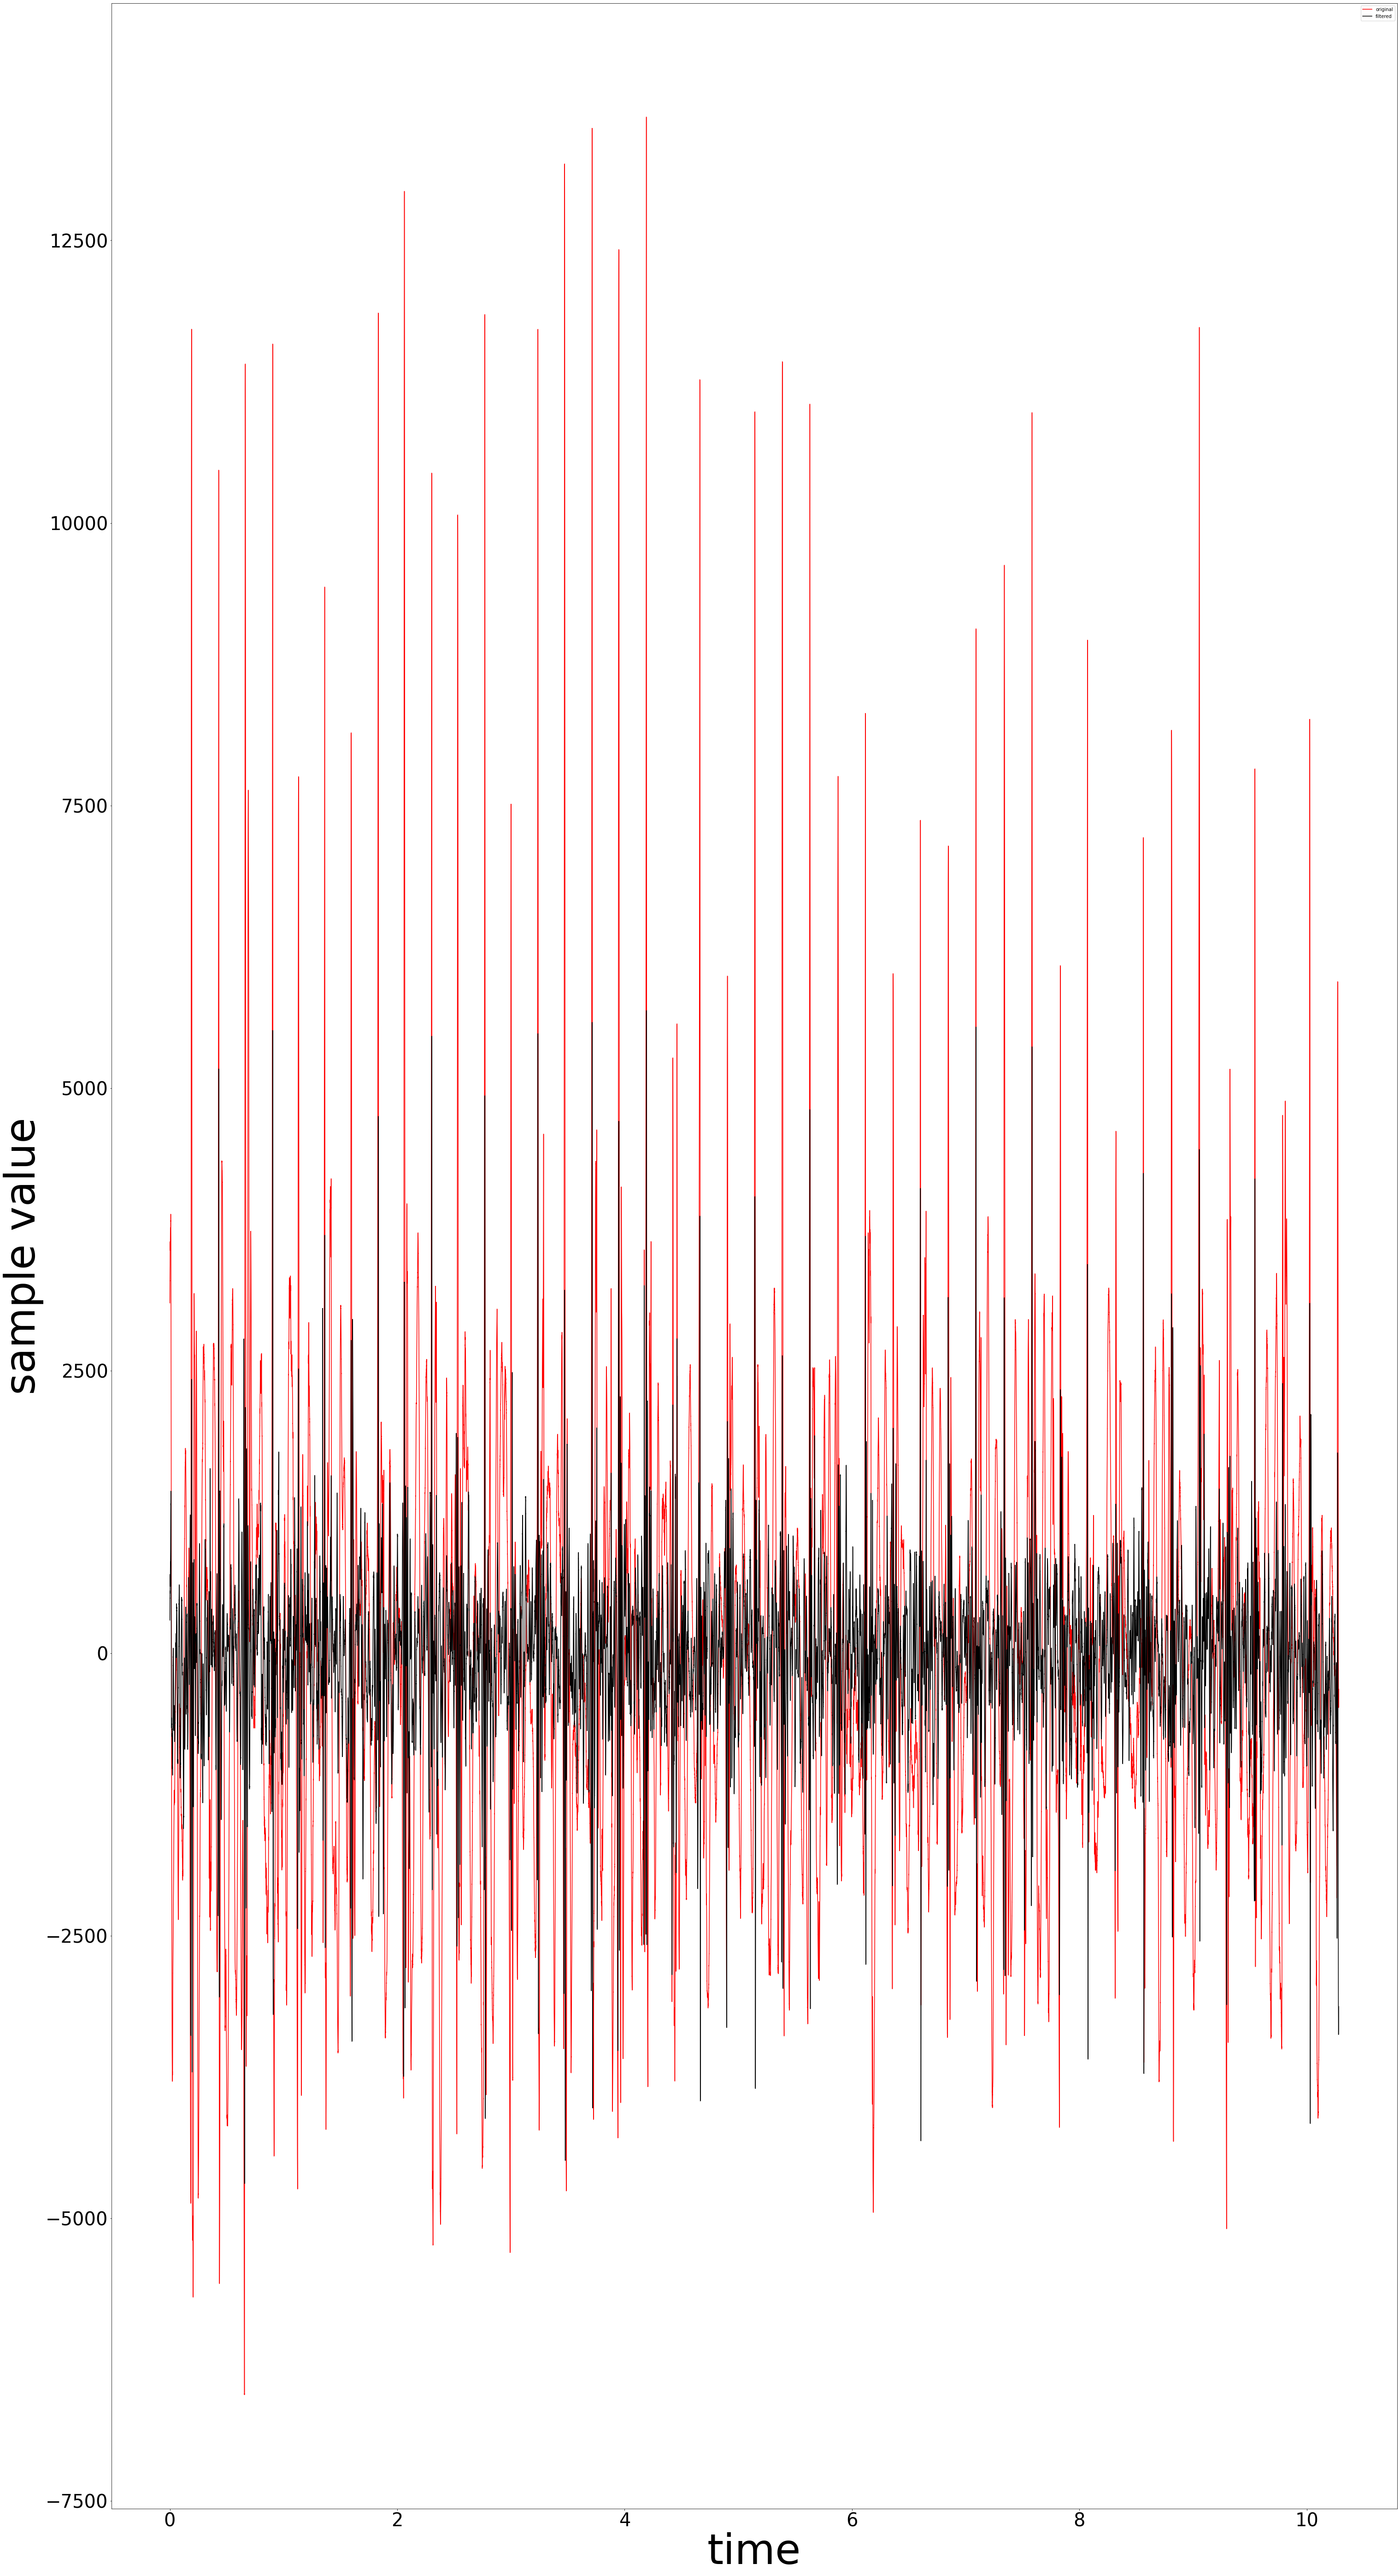

In [5]:
indices = PSD < 500000000
PSDclean = PSD * indices
fhat = indices * fhta
ffilt = np.fft.ifft(fhat)
plt.plot(time_heart, wavhart, color="red", label ='original')
plt.xlabel ("time", fontsize=90)
plt.xticks(fontsize = 40)
plt.ylabel ("sample value", fontsize=90)
plt.yticks(fontsize = 40)
plt.plot(time_heart, ffilt, color="black", label='filtered')
plt.legend()